![](https://img.shields.io/badge/PO.DAAC-Contribution-%20?color=grey&labelColor=blue)

> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/GIS/SWOT_GISshapefiles.ipynb).

# SWOT North American Continent Hydrology Dataset

## Finding ways to visualize SWOT Hydrology River Shapefile Dataset

Authored by Nicholas Tarpinian, *PO.DAAC*

## Summary

The following tutorial is looking to explore geospatial libraries and visualizing vector datasets without the use of a GIS desktop software. Specifically looking at the latest Surface Water and Ocean Topography (SWOT) river reach hydrology dataset.

------

## Requirements

### 1. Compute environment

- **Local compute environment** e.g. laptop, server: this tutorial can be run on your local machine.
- **Utilizing Anaconda Navigator** to create your enviroments. Accessing the Conda-Forge channel to install geopsatial libraries, e.g. GDAL and GeoPandas.

### 2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

------

### Learning Objectives:
- Accessing SWOT shapefile hydrology dataset through earthaccess and visualizing it locally.
- Visualizing the dataset through the use of geospatial libraries; including Geopandas & Matplotlib.
- Visualzing either a single river reach or merging multiple reaches to a single shapefile.
- Querying specific variables of interest. 

------

### Import libraries

In [1]:
import os
import glob 
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import earthaccess

## Authentication with earthaccess

In this notebook, we will be calling the authentication in the below cell.

In [2]:
auth = earthaccess.login()

### Search using `earthaccess` for SWOT River Reaches

Each dataset has it's own unique collection concept ID. For this dataset it is SWOT_L2_HR_RiverSP_2.0. We don't need 1000+ files, we just want the river reach files over North America. SWOT files come in "reach" and "node" versions in the same collection, here we want the 10km reaches rather than the nodes. We will also only get files for North America, or 'NA' via wildcard search.

In [3]:
results = earthaccess.search_data(short_name = 'SWOT_L2_HR_RIVERSP_2.0', 
                                  temporal = ('2024-02-01 00:00:00', '2024-02-29 23:59:59'), # can also specify by time
                                  granule_name = '*Reach*_NA_*') # here we filter by Reach files (not node), continent code=NA

Granules found: 192


### Download the Data into a folder

In [ ]:
earthaccess.download(results, "../datasets/data_downloads/SWOT_River_Feb2024")

### Unzip shapefiles to existing folder

In [5]:
folder = Path("../datasets/data_downloads/SWOT_River_Feb2024")
for item in os.listdir(folder): # loop through items in dir
    if item.endswith(".zip"): # check for ".zip" extension
        zip_ref = zipfile.ZipFile(f"{folder}/{item}") # create zipfile object
        zip_ref.extractall(folder) # extract file to dir
        zip_ref.close() # close file

### Opening a Single Shapefile

Using Geopandas to open & read a single shapefile. (Select desired single pass from list with path to downloaded shapefile)

In [6]:
River = gpd.read_file(folder / 'SWOT_L2_HR_RiverSP_Reach_010_380_NA_20240207T132630_20240207T132640_PIC0_01.shp')
River

reach_id          time      time_tai              time_str      p_lat  \
0    72302000011  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.945799   
1    72302000021  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.947712   
2    72302000043  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.973874   
3    72302000051  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.995478   
4    72302000063  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.997805   
..           ...           ...           ...                   ...        ...   
210  72350800071  7.606277e+08  7.606277e+08  2024-02-07T13:28:11Z  51.791094   
211  72350800081  7.606277e+08  7.606277e+08  2024-02-07T13:28:10Z  51.886956   
212  72350800091  7.606277e+08  7.606277e+08  2024-02-07T13:28:01Z  51.966072   
213  72350800101  7.606277e+08  7.606277e+08  2024-02-07T13:28:01Z  52.045314   
214  72350800111  7.606277e+08  7.606277e+08  2024-02-07T13:28:11Z  51.696292   

         p_lon            river_name           wse         wse_u  \
0   -57.862132          Humber River  4.236410e+01  8.633000e-01   
1   -57.846809          Humber River -1.000000e+12 -1.000000e+12   
2   -57.788332          Humber River  5.920900e+00  1.440190e+00   
3   -57.730291          Humber River  3.668880e+01  9.367000e-02   
4   -57.715888          Humber River  2.784380e+01  9.033000e-02   
..         ...                   ...           ...           ...   
210 -58.985455               no_data  9.711690e+01  3.278100e+00   
211 -59.172704               no_data  1.168453e+02  7.567680e+00   
212 -59.344178               no_data  9.837220e+01  1.775170e+00   
213 -59.409170  Saint-Augustin River  1.425316e+02  7.325890e+00   
214 -58.702223               no_data  1.045083e+02  1.271013e+01   

          wse_r_u  ...  p_wid_var  p_n_nodes  p_dist_out      p_length  \
0    8.585900e-01  ...    675.648         10    2135.645   1984.456750   
1   -1.000000e+12  ...    217.623          4    3008.992    873.346819   
2    1.437370e+00  ...   7900.098         46   12109.956   9100.964613   
3    2.596000e-02  ...    397.512          7   13444.660   1334.703115   
4    7.670000e-03  ...   1089.674          6   14714.137   1269.477822   
..            ...  ...        ...        ...         ...           ...   
210  3.276860e+00  ...    821.862         82  119786.053  16448.306136   
211  7.567140e+00  ...   2599.684         99  139644.759  19858.706858   
212  1.772890e+00  ...   2313.937         64  152412.397  12767.637572   
213  7.325330e+00  ...    590.479         68  166028.213  13615.816320   
214  1.270981e+01  ...   1257.012         97   79887.666  19340.975021   

            p_maf  p_dam_id  p_n_ch_max  p_n_ch_mod  p_low_slp  \
0   -1.000000e+12         0           1           1          0   
1   -1.000000e+12         0           1           1          0   
2   -1.000000e+12         0           2           1          0   
3   -1.000000e+12         0           1           1          0   
4   -1.000000e+12         0           1           1          0   
..            ...       ...         ...         ...        ...   
210 -1.000000e+12         0           2           1          0   
211 -1.000000e+12         0           2           1          0   
212 -1.000000e+12         0           2           1          0   
213 -1.000000e+12         0           1           1          0   
214 -1.000000e+12         0           2           1          0   

                                              geometry  
0    LINESTRING (-57.87428 48.95038, -57.87387 48.9...  
1    LINESTRING (-57.85082 48.94446, -57.85058 48.9...  
2    LINESTRING (-57.83865 48.95172, -57.83824 48.9...  
3    LINESTRING (-57.73845 48.99230, -57.73804 48.9...  
4    LINESTRING (-57.72209 48.99569, -57.72168 48.9...  
..                                                 ...  
210  LINESTRING (-58.89330 51.77895, -58.89374 51.7...  
211  LINESTRING (-59.07129 51.82866, -59.07148 51.8...  
212  LINESTRING (-59.37

### Plotting a Shapefile

Using Matplotlib to plot the shapefile, then adding a basemap for context using the library Contextily.

Contextily offers a list of basemap providers that can be easily visualized.

https://contextily.readthedocs.io/en/latest/intro_guide.html

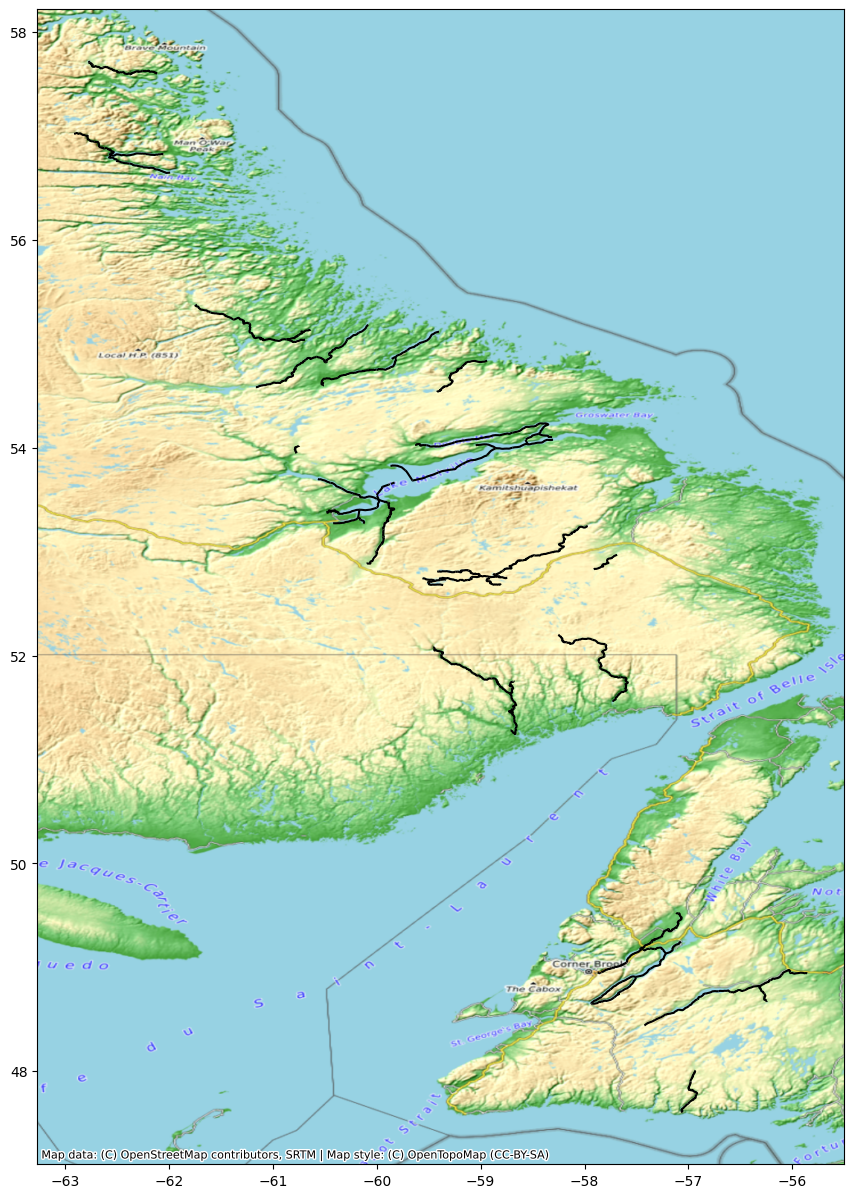

In [7]:
fig, ax = plt.subplots(figsize=(25,15))
River.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.OpenTopoMap)

### Shapefile Attribute Visualization

Shapefiles have various attributes or variables with each column signifiying individual data values.

Previously, we plotted by showcasing the full path of the river reach on the map. 

You can also plot a shapefile based on a specific variable.

Within Matplotlib you can specifiy the column parameter based on the column within the datasets attributes.

For the example below, we will look at the column 'wse' which stands for water surface elevation.

In [8]:
#First, we set all -999999999999 values to nan so that the color variation shows in the values.
River["wse"] = River.wse.apply(lambda x: x if x > -10 else np.nan)

<Axes: >

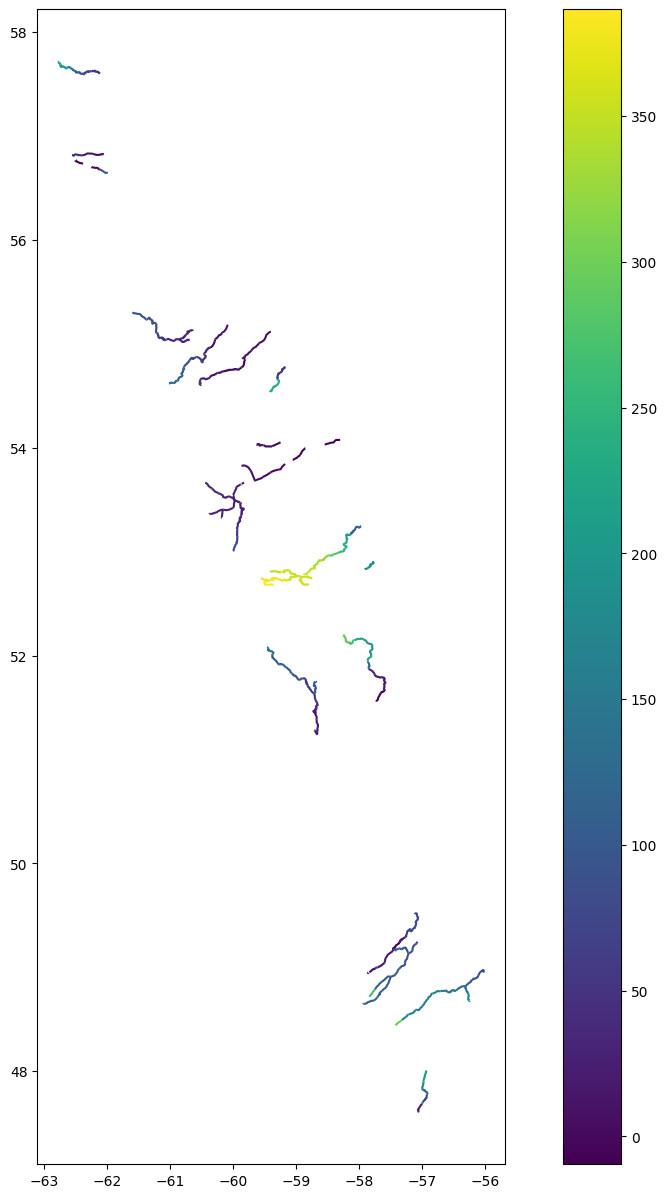

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
River.plot(column='wse', ax=ax, legend=True, cmap='viridis')

### Querying a Shapefile

If you want to search for a specific reach id or a specific length of river reach that is possible through a spatial query using Geopandas. 

Utilizing comparison operators (>, <, ==, >=, <=).

In [10]:
Query = River.query("reach_id == '72350800091'")
Query

reach_id          time      time_tai              time_str      p_lat  \
212  72350800091  7.606277e+08  7.606277e+08  2024-02-07T13:28:01Z  51.966072   

         p_lon river_name      wse    wse_u  wse_r_u  ...  p_wid_var  \
212 -59.344178    no_data  98.3722  1.77517  1.77289  ...   2313.937   

     p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  p_n_ch_max  \
212         64  152412.397  12767.637572 -1.000000e+12         0           2   

     p_n_ch_mod  p_low_slp                                           geometry  
212           1          0  LINESTRING (-59.37449 52.01016, -59.37465 52.0...  

[1 rows x 127 columns]

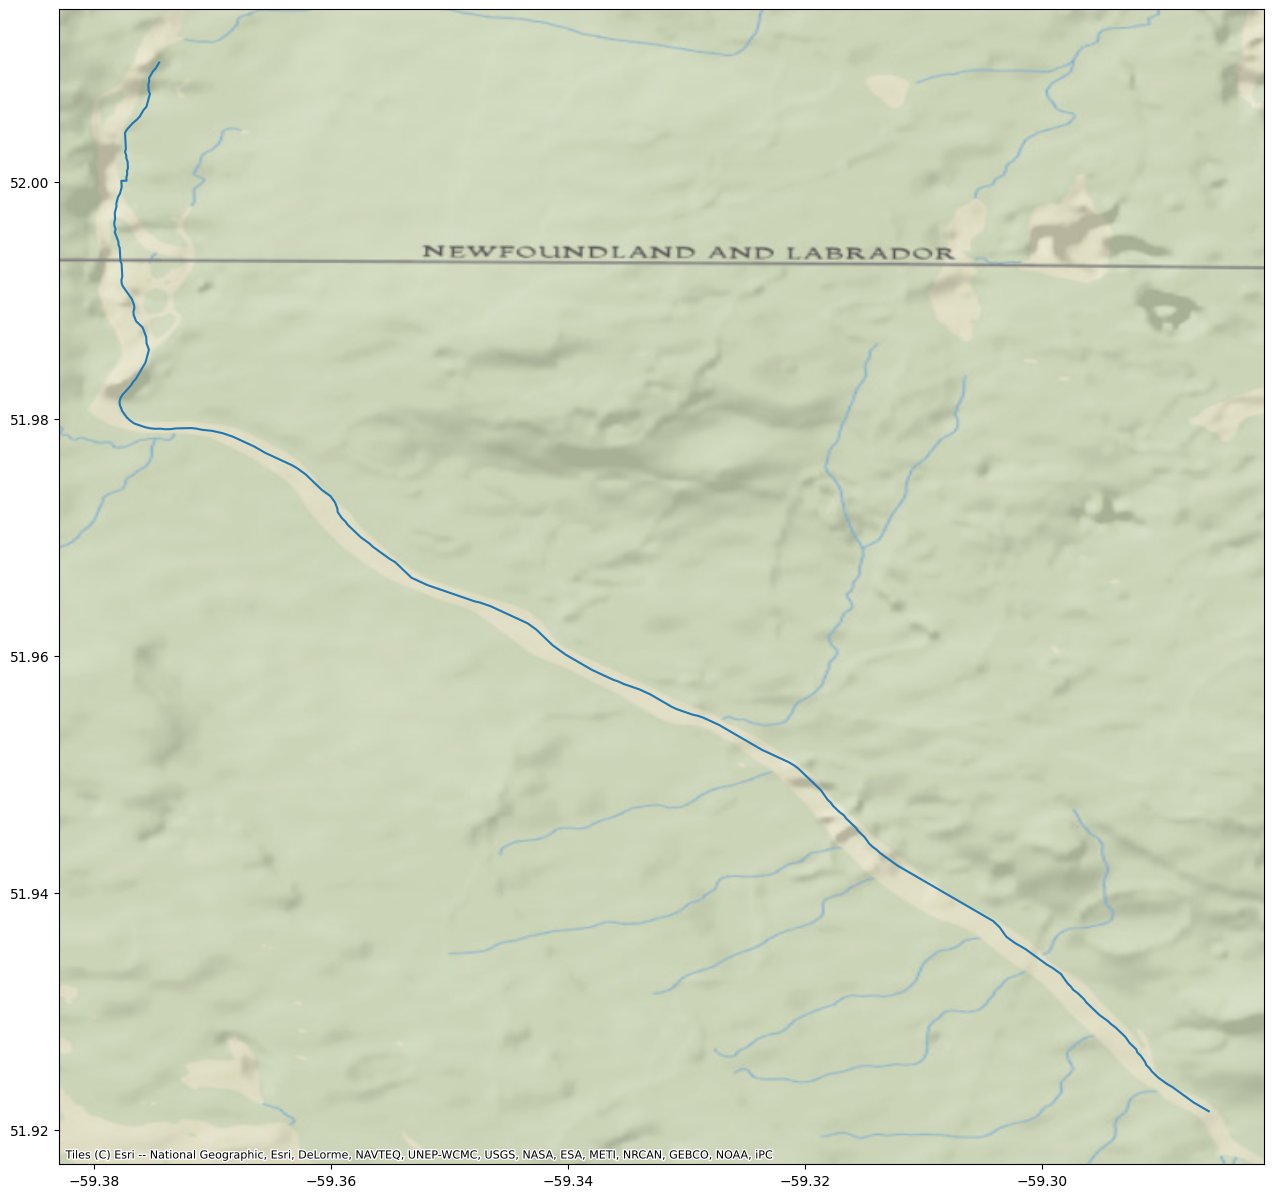

In [11]:
fig, ax = plt.subplots(figsize=(25,15))
Query.plot(ax=ax, legend=True)
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

### You can specify river reaches that have a water surface elevation greater than 35 meters.

In [12]:
WSE = River.query('wse > 35')
WSE

reach_id          time      time_tai              time_str      p_lat  \
0    72302000011  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.945799   
3    72302000051  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  48.995478   
9    72302000111  7.606277e+08  7.606278e+08  2024-02-07T13:29:00Z  49.170904   
10   72302000123  7.606277e+08  7.606278e+08  2024-02-07T13:29:00Z  49.177845   
11   72302000131  7.606277e+08  7.606278e+08  2024-02-07T13:29:01Z  49.171135   
..           ...           ...           ...                   ...        ...   
210  72350800071  7.606277e+08  7.606277e+08  2024-02-07T13:28:11Z  51.791094   
211  72350800081  7.606277e+08  7.606277e+08  2024-02-07T13:28:10Z  51.886956   
212  72350800091  7.606277e+08  7.606277e+08  2024-02-07T13:28:01Z  51.966072   
213  72350800101  7.606277e+08  7.606277e+08  2024-02-07T13:28:01Z  52.045314   
214  72350800111  7.606277e+08  7.606277e+08  2024-02-07T13:28:11Z  51.696292   

         p_lon            river_name       wse     wse_u   wse_r_u  ...  \
0   -57.862132          Humber River   42.3641   0.86330   0.85859  ...   
3   -57.730291          Humber River   36.6888   0.09367   0.02596  ...   
9   -57.404776               no_data  118.9760   0.83515   0.83029  ...   
10  -57.348725               no_data  116.7355   0.09589   0.03309  ...   
11  -57.263679               no_data   92.1803   1.43050   1.42767  ...   
..         ...                   ...       ...       ...       ...  ...   
210 -58.985455               no_data   97.1169   3.27810   3.27686  ...   
211 -59.172704               no_data  116.8453   7.56768   7.56714  ...   
212 -59.344178               no_data   98.3722   1.77517   1.77289  ...   
213 -59.409170  Saint-Augustin River  142.5316   7.32589   7.32533  ...   
214 -58.702223               no_data  104.5083  12.71013  12.70981  ...   

      p_wid_var  p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  \
0       675.648         10    2135.645   1984.456750 -1.000000e+12         0   
3       397.512          7   13444.660   1334.703115 -1.000000e+12         0   
9       105.642         28   50331.655   5596.729779 -1.000000e+12         0   
10    35547.561         20   54269.288   3937.633107 -1.000000e+12         0   
11   500301.988         61   66530.524  12261.235771 -1.000000e+12         0   
..          ...        ...         ...           ...           ...       ...   
210     821.862         82  119786.053  16448.306136 -1.000000e+12         0   
211    2599.684         99  139644.759  19858.706858 -1.000000e+12         0   
212    2313.937         64  152412.397  12767.637572 -1.000000e+12         0   
213     590.479         68  166028.213  13615.816320 -1.000000e+12         0   
214    1257.012         97   79887.666  19340.975021 -1.000000e+12         0   

     p_n_ch_max  p_n_ch_mod  p_low_slp  \
0             1           1          0   
3             1           1          0   
9             1           1          0   
10            2           1          0   
11            4           1          0   
..          ...         ...        ...   
210           2           1          0   
211           2           1          0   
212           2           1          0   
213           1           1          0   
214           2           1          0   

                                              geometry  
0    LINESTRING (-57.87428 48.95038, -57.87387 48.9...  
3    LINESTRING (-57.73845 48.99230, -57.73804 48.9...  
9    LINESTRING (-57.43636 49.16979, -57.43570 49.1...  
10   LINESTRING (-57.37279 49.17719, -57.37255 49.1...  
11   LINESTRING (-57.32502 49.17382, -57.32461 49.1...  
..                                                 ...  
210  LINESTRING (-58.89330 51.77895, -58.89374 51.7...  
211  LINESTRING (-59.07129 51.82866, -59.07148 51.8...  
212  LINESTRING (-59.37449 52.01016, -59.37465 52.0...  
213  LINESTRING (-59.37465 52.00988, -59.37449 52.0...  
214  LINESTRING (-58.72011 51.63638, -58.

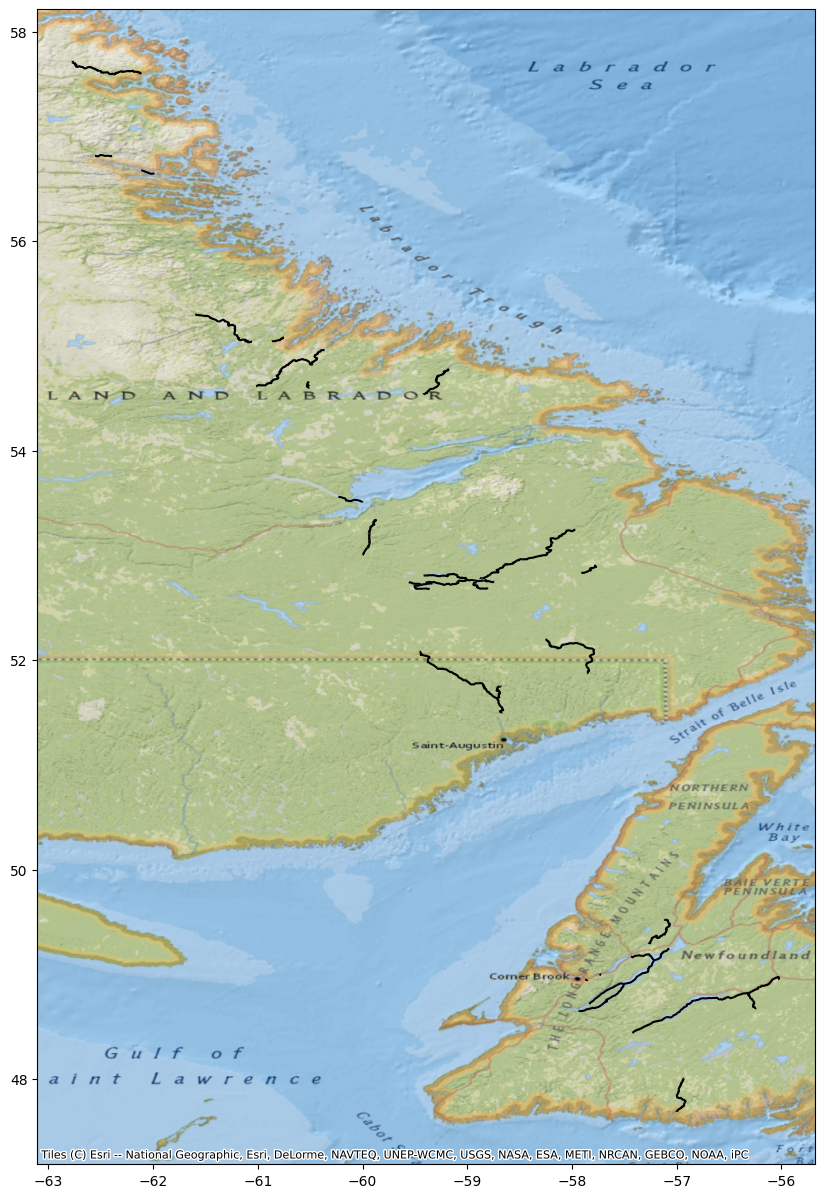

In [13]:
fig, ax = plt.subplots(figsize=(25,15))
WSE.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

## Merging multiple reaches to a single shapefile

- If you have multiple River Reaches or Nodes in a folder, it is possible to visualize all on a single map.
- Utilizing both Glob and Pathlib libraries to read the folder, then using Pandas concat to merge the reaches to its own variable.

In [ ]:
# State filename extension to look for within folder, in this case .shp which is the shapefile
shapefiles = folder.glob("*.shp")

# Merge/Combine multiple shapefiles in folder into one
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)

# Export merged geodataframe into shapefile
gdf.to_file(folder / 'SWOTReaches_Feb.shp')

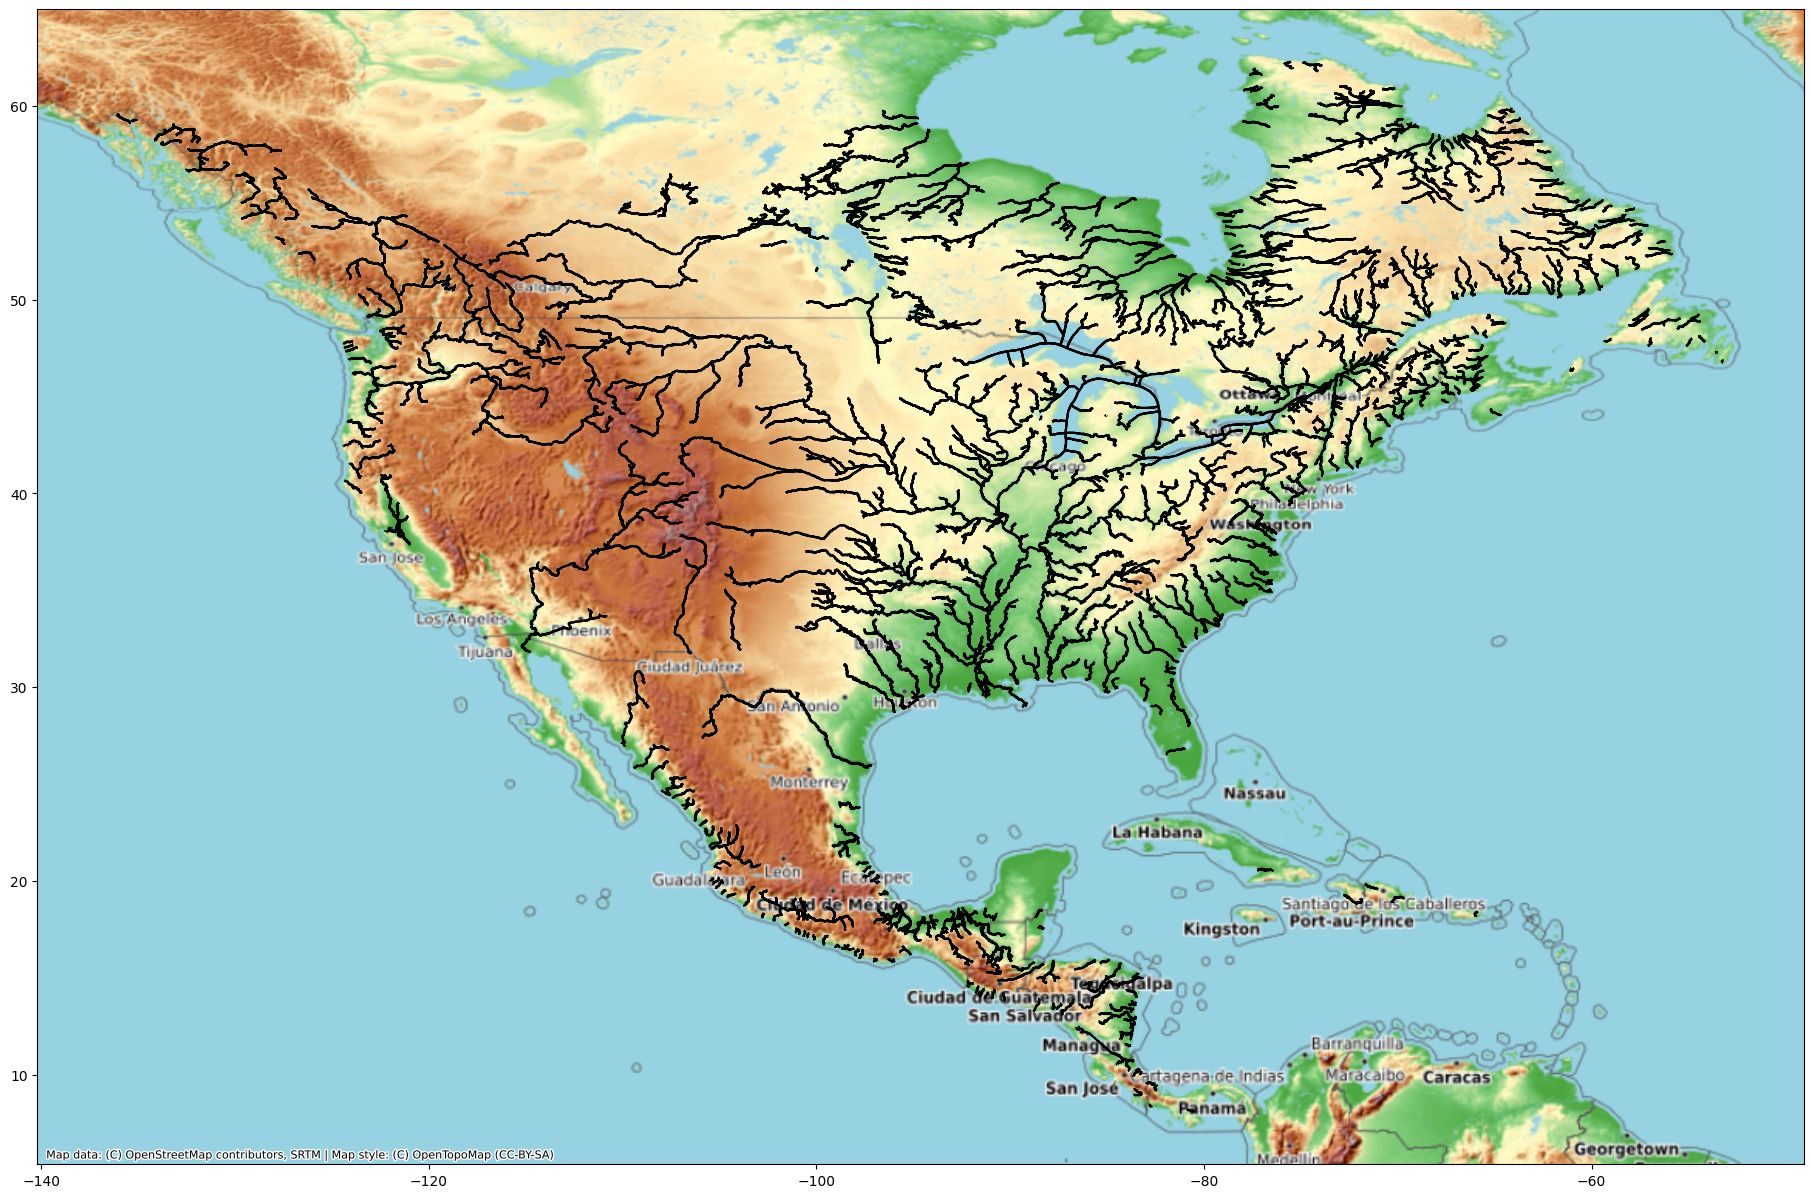

In [19]:
fig, ax = plt.subplots(figsize=(25,15))
gdf.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenTopoMap)